## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Ploting function

In [2]:
def plot_relevant(df):
    for col in range(2,df.shape[1],2):
        df.iloc[:,[col,col+1]].plot(subplots=True, figsize=(15,16))
    plt.show()

## Setup Dataset

### Load

In [3]:
df1 = pd.read_csv('/kaggle/input/global-earth-temperatures/Global Temperature.csv')
df1.head(4)

,Year,Month,Monthly Anomaly,Monthly Unc.,Annual Anomaly,Annual Unc,Five-Year Anomaly,Five-Year Unc.,Ten-Year Anomaly,Ten-Year Unc.,Twenty-Year Anomaly,Twenty-year Unc.
0,1850,1,-0.801,0.482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1850,2,-0.102,0.592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,3,-0.119,0.819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1850,4,-0.485,0.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Fix columns names

In [4]:
df1.dtypes

Year                       int64
 Month                     int64
Monthly Anomaly          float64
 Monthly Unc.             object
  Annual Anomaly          object
 Annual Unc               object
Five-Year Anomaly         object
 Five-Year Unc.           object
 Ten-Year Anomaly         object
 Ten-Year Unc.            object
  Twenty-Year Anomaly     object
 Twenty-year Unc.         object
dtype: object

In [5]:
# delete spaces in columns names
df1.columns = df1.columns.map(lambda name: name.strip())

### check null values

In [6]:
# we can see the nulls in the above so the result is not normal
df1.isnull().sum()

Year                   0
Month                  0
Monthly Anomaly        0
Monthly Unc.           0
Annual Anomaly         0
Annual Unc             0
Five-Year Anomaly      0
Five-Year Unc.         0
Ten-Year Anomaly       0
Ten-Year Unc.          0
Twenty-Year Anomaly    0
Twenty-year Unc.       0
dtype: int64

In [7]:
#the values are str not a real np.nan
df1['Five-Year Anomaly'].unique()[0]

'   NaN'

In [8]:
# fix the values
df1[df1.columns[2:]] = df1[df1.columns[2:]].applymap(lambda string:float(string))

In [9]:
df1.dtypes

Year                     int64
Month                    int64
Monthly Anomaly        float64
Monthly Unc.           float64
Annual Anomaly         float64
Annual Unc             float64
Five-Year Anomaly      float64
Five-Year Unc.         float64
Ten-Year Anomaly       float64
Ten-Year Unc.          float64
Twenty-Year Anomaly    float64
Twenty-year Unc.       float64
dtype: object

In [10]:
df1.isnull().sum()

Year                     0
Month                    0
Monthly Anomaly          0
Monthly Unc.            13
Annual Anomaly          11
Annual Unc              24
Five-Year Anomaly       59
Five-Year Unc.          72
Ten-Year Anomaly       119
Ten-Year Unc.          132
Twenty-Year Anomaly    239
Twenty-year Unc.       252
dtype: int64

In [11]:
df2 = df1.copy()

### setup index

In [12]:
#make a new index for the Year and Month columns

df2['Date'] = pd.to_datetime(df2[['Year', 'Month']].assign(day=1))
df2.set_index('Date', inplace=True)

df2.index = df2.index.strftime('%Y-%m')
df2.head(2)

,Year,Month,Monthly Anomaly,Monthly Unc.,Annual Anomaly,Annual Unc,Five-Year Anomaly,Five-Year Unc.,Ten-Year Anomaly,Ten-Year Unc.,Twenty-Year Anomaly,Twenty-year Unc.
Date,,,,,,,,,,,,
1850-01,1850,1,-0.801,0.482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1850-02,1850,2,-0.102,0.592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Ploting

### With null values

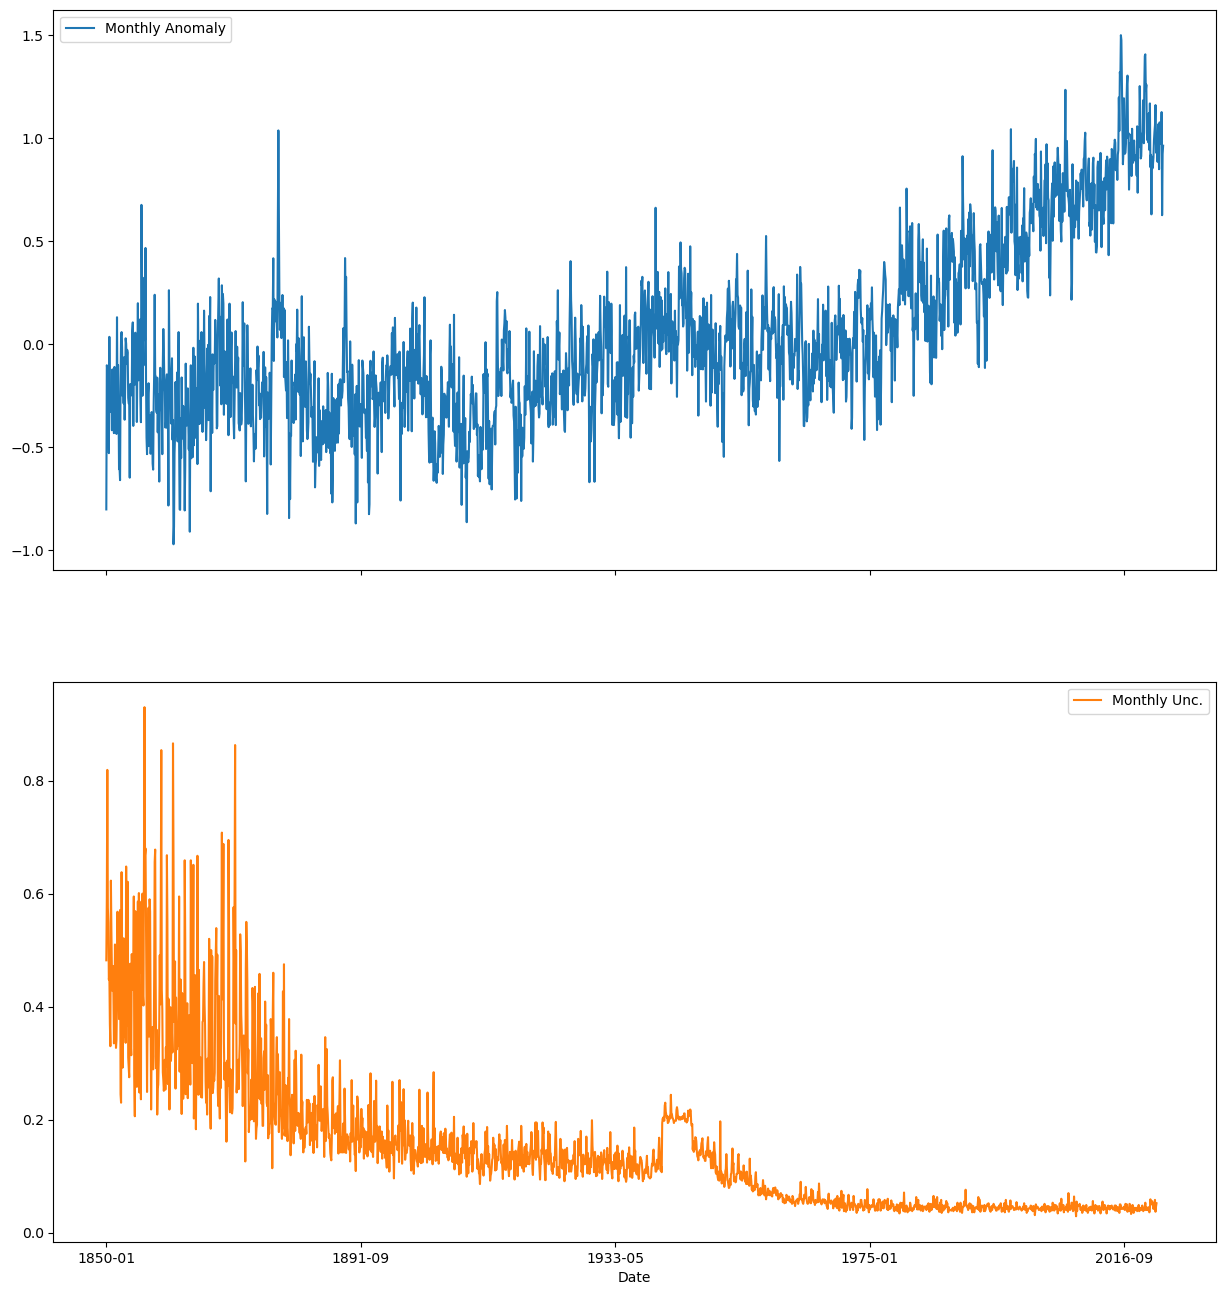

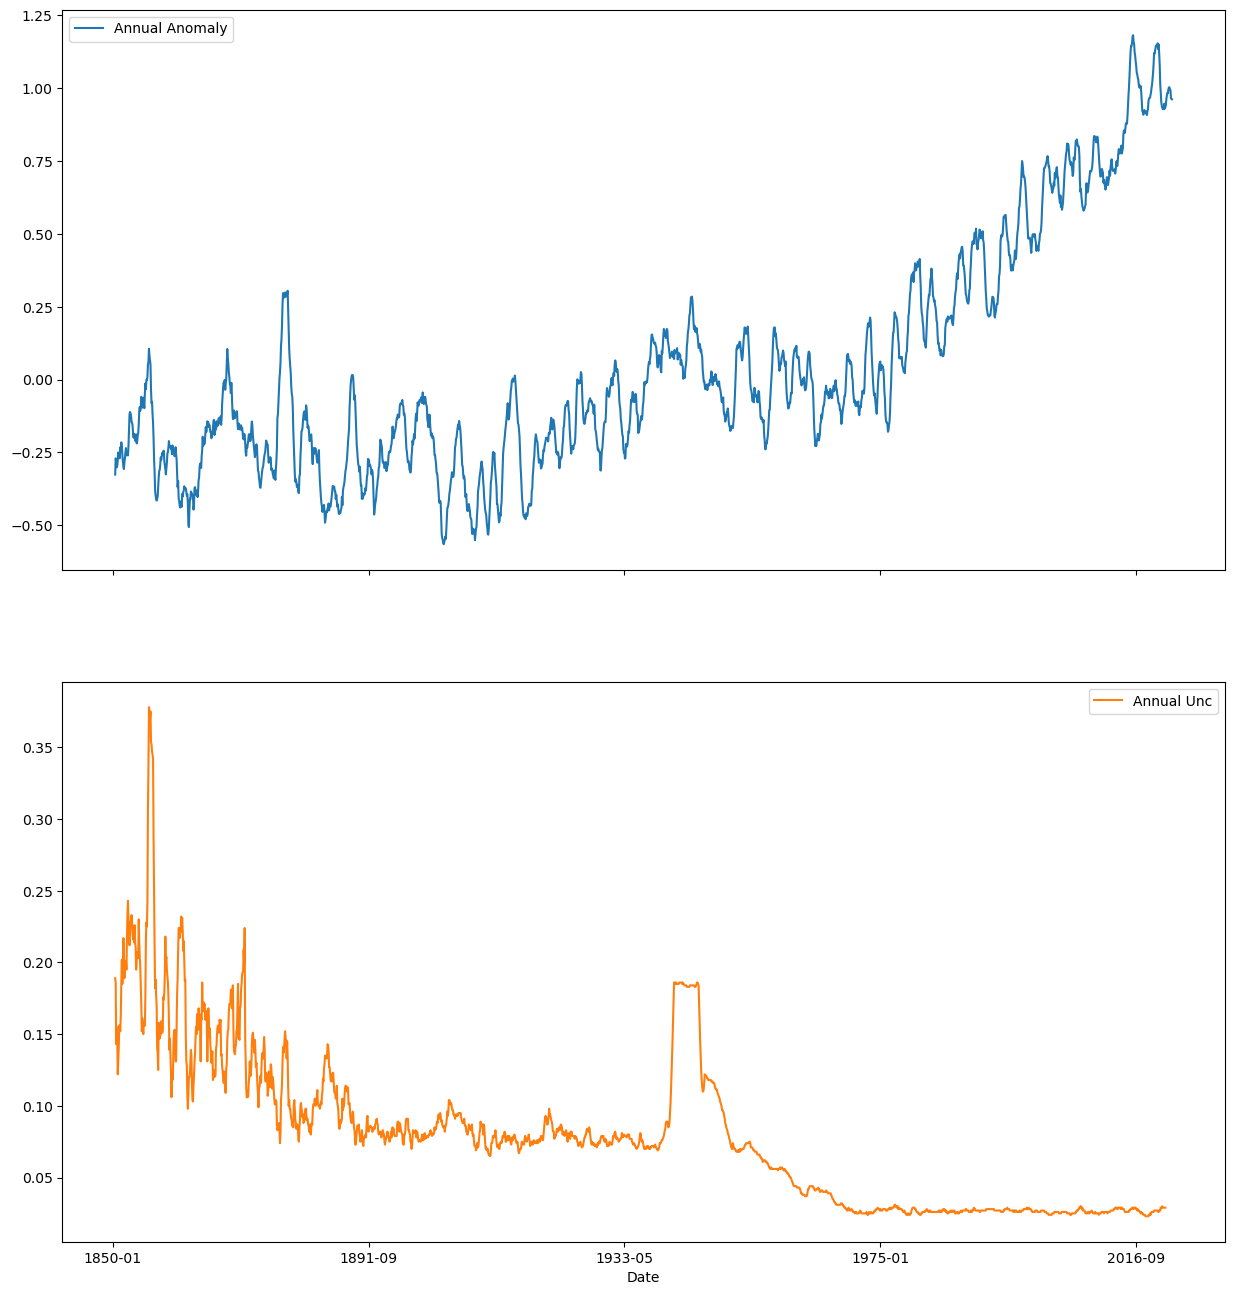

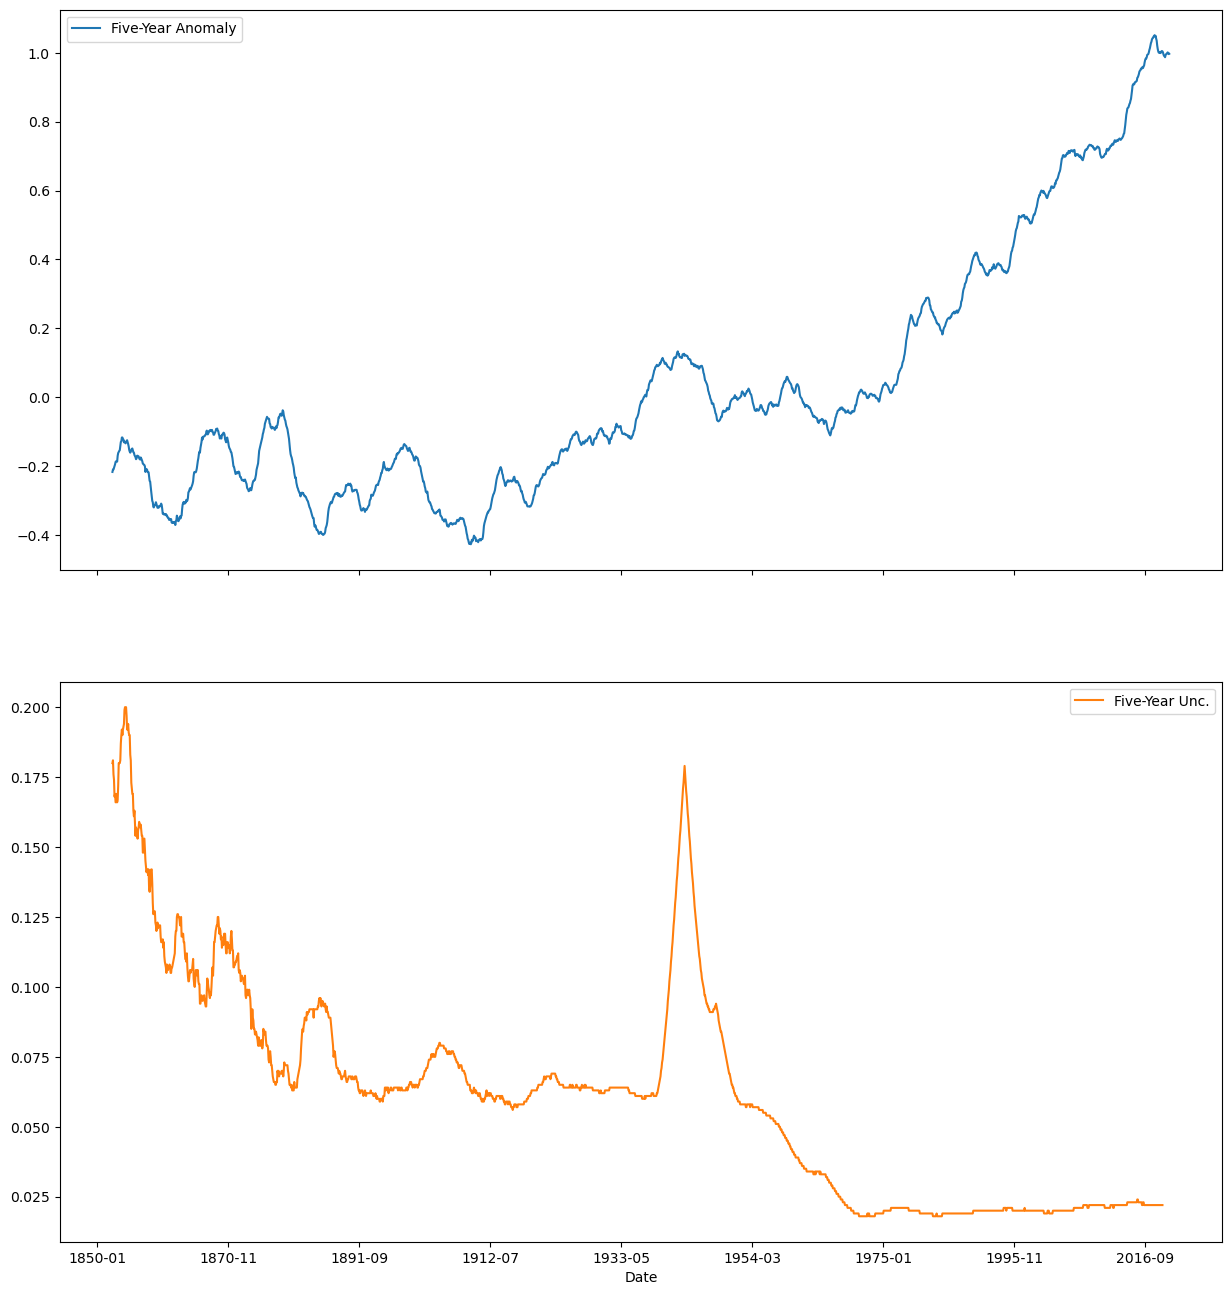

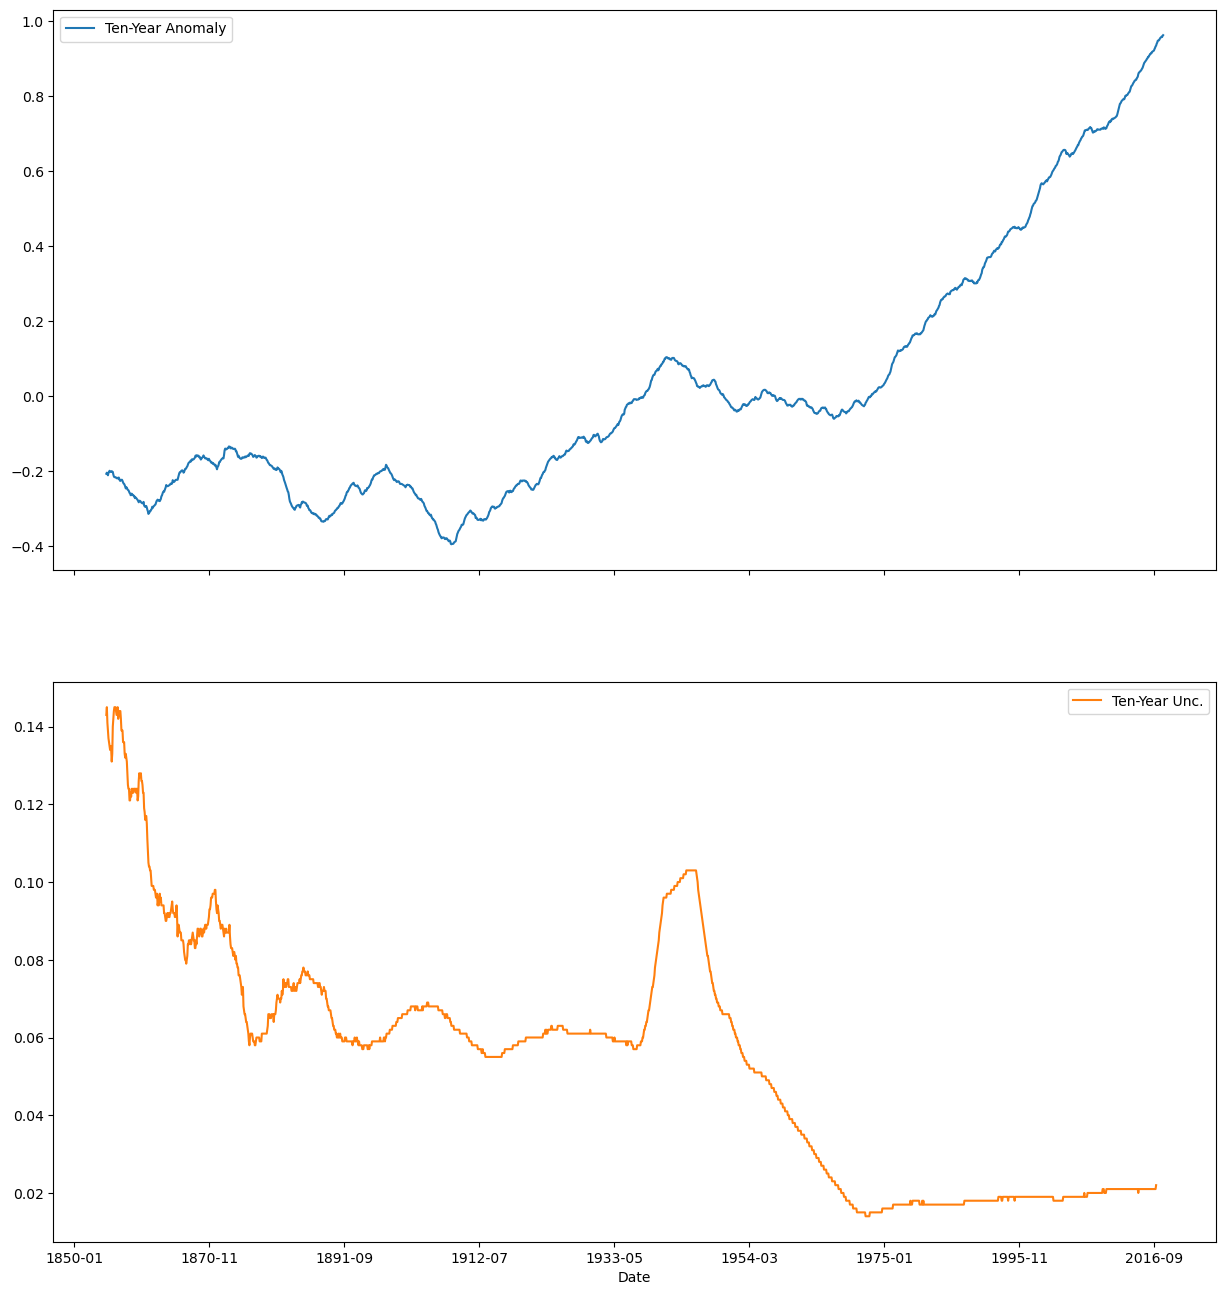

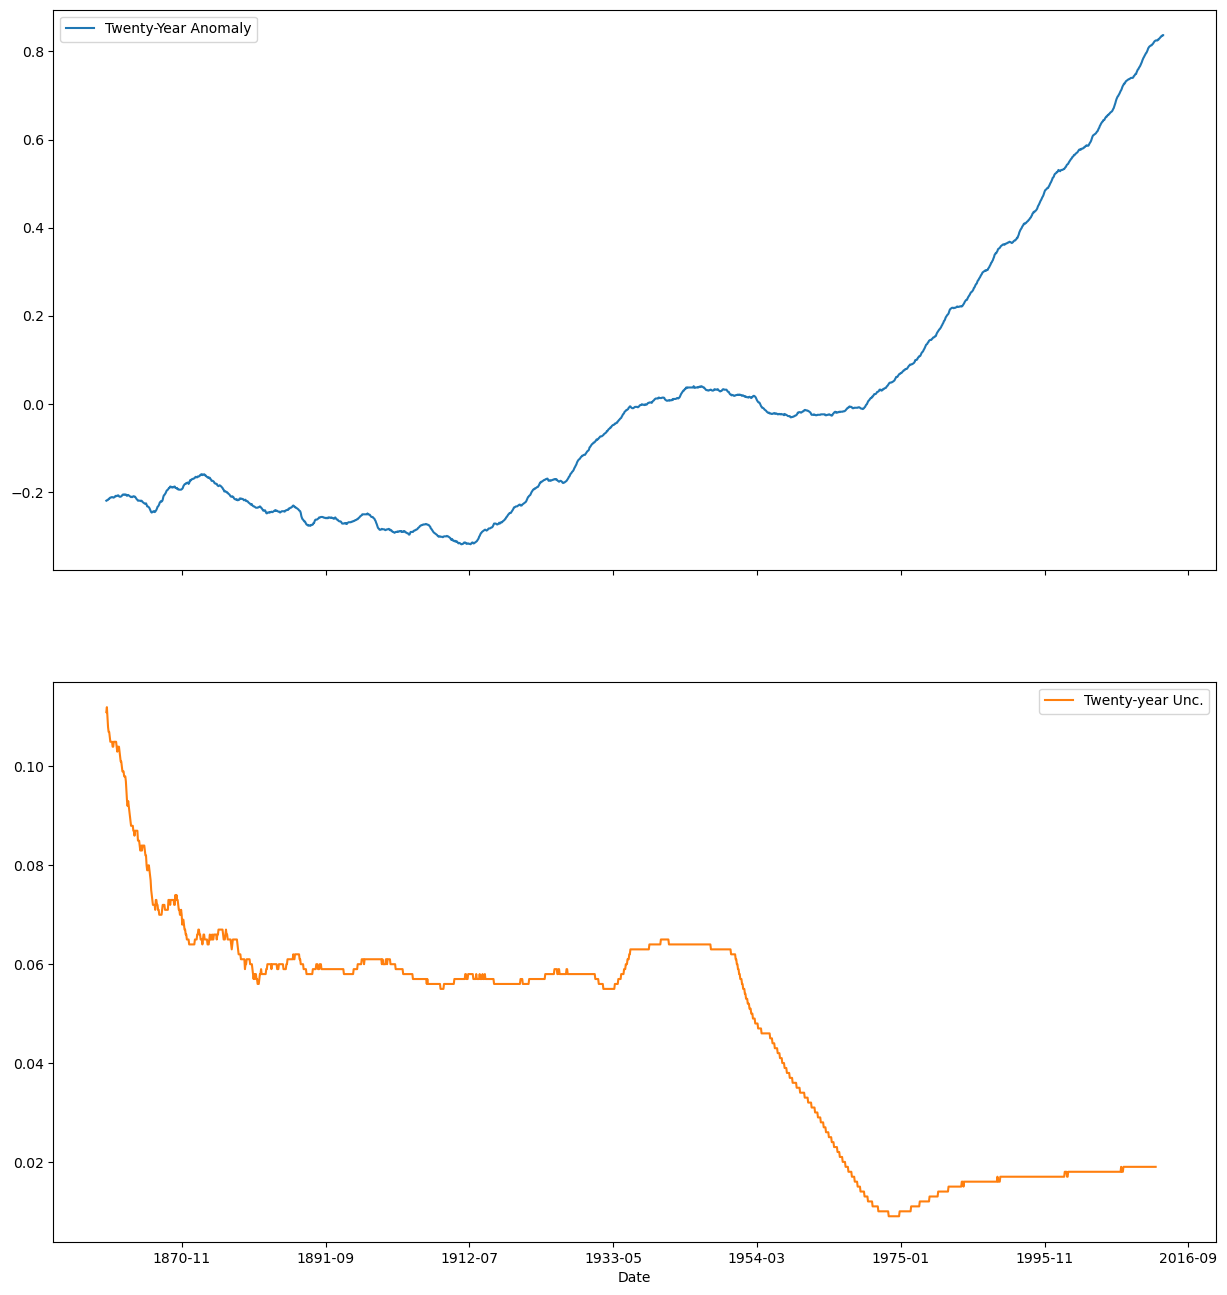

In [13]:
# plot the Anomaly and Unc for every intreval (Monthly, Annual, ....)
plot_relevant(df2)

In [14]:
#fill null values using forward and backward fill
df3 = df2.fillna(method = 'ffill').fillna(method = 'bfill')
df3.isnull().sum()

Year                   0
Month                  0
Monthly Anomaly        0
Monthly Unc.           0
Annual Anomaly         0
Annual Unc             0
Five-Year Anomaly      0
Five-Year Unc.         0
Ten-Year Anomaly       0
Ten-Year Unc.          0
Twenty-Year Anomaly    0
Twenty-year Unc.       0
dtype: int64

### Without null values

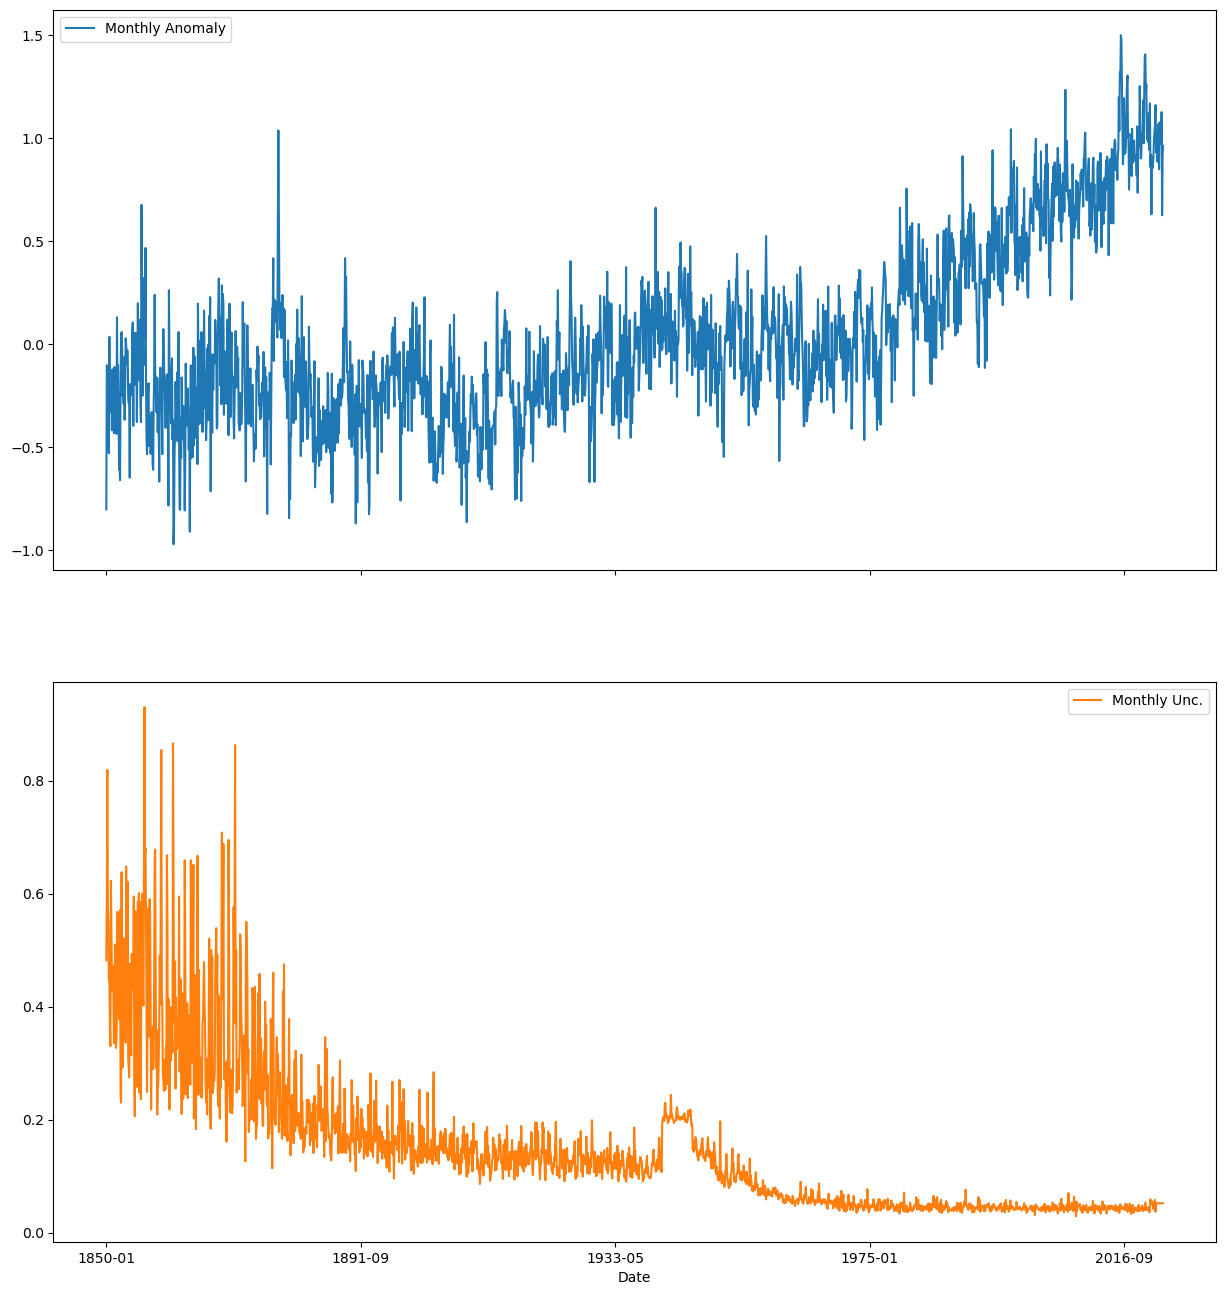

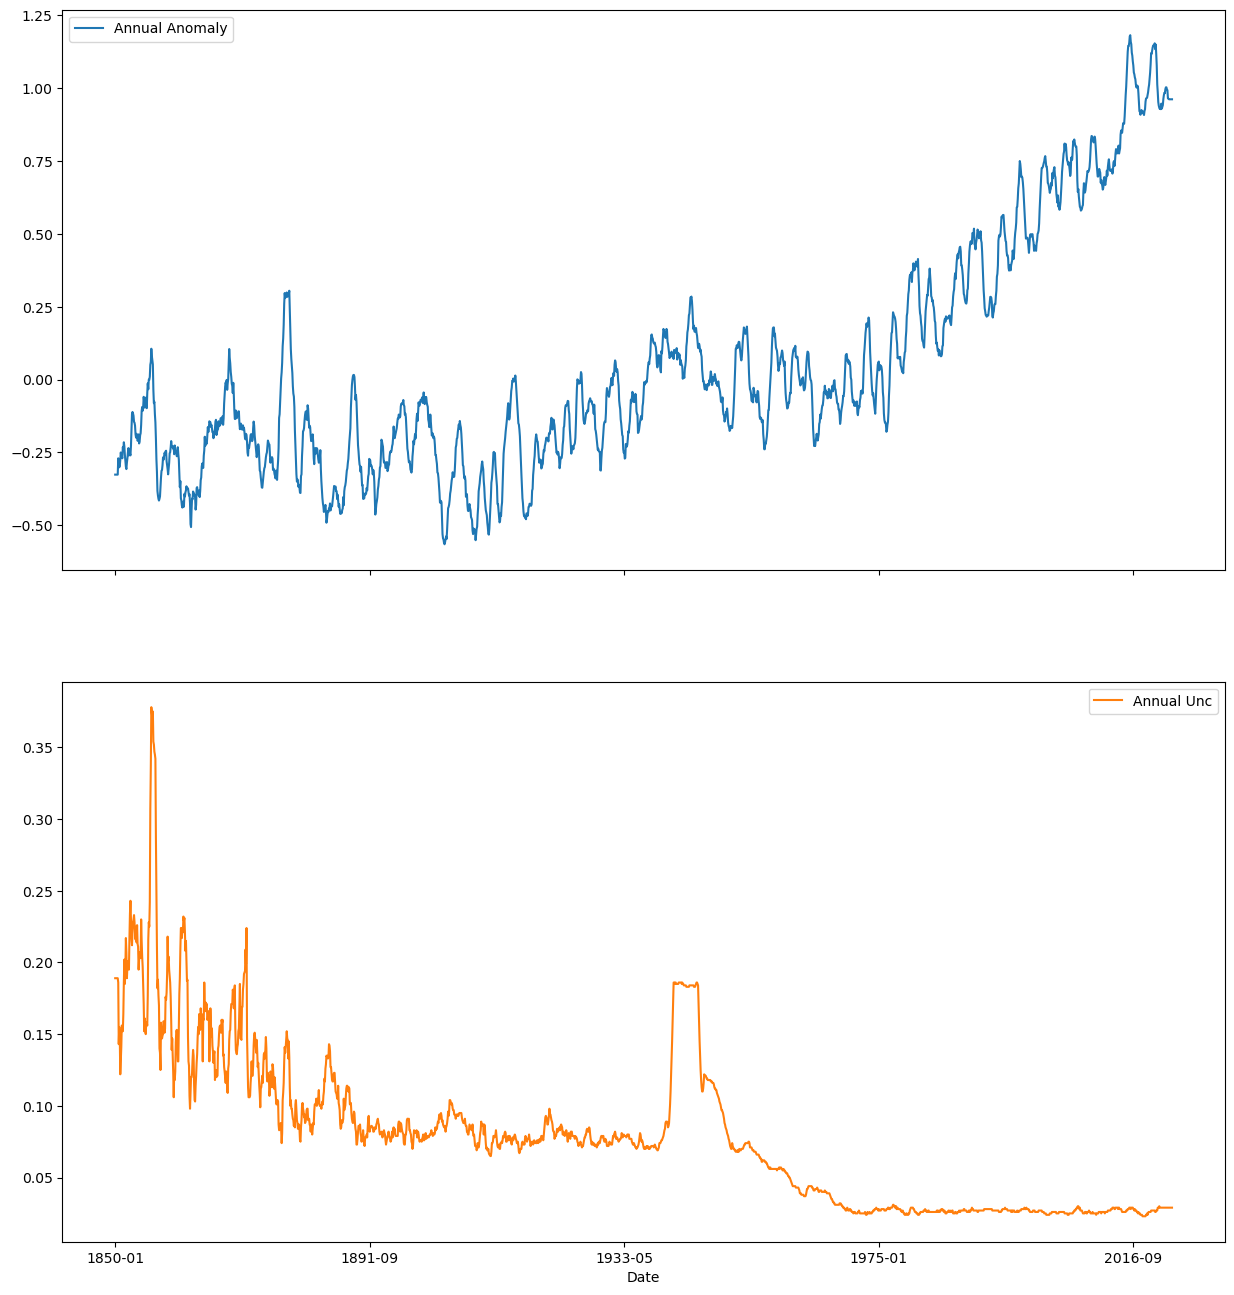

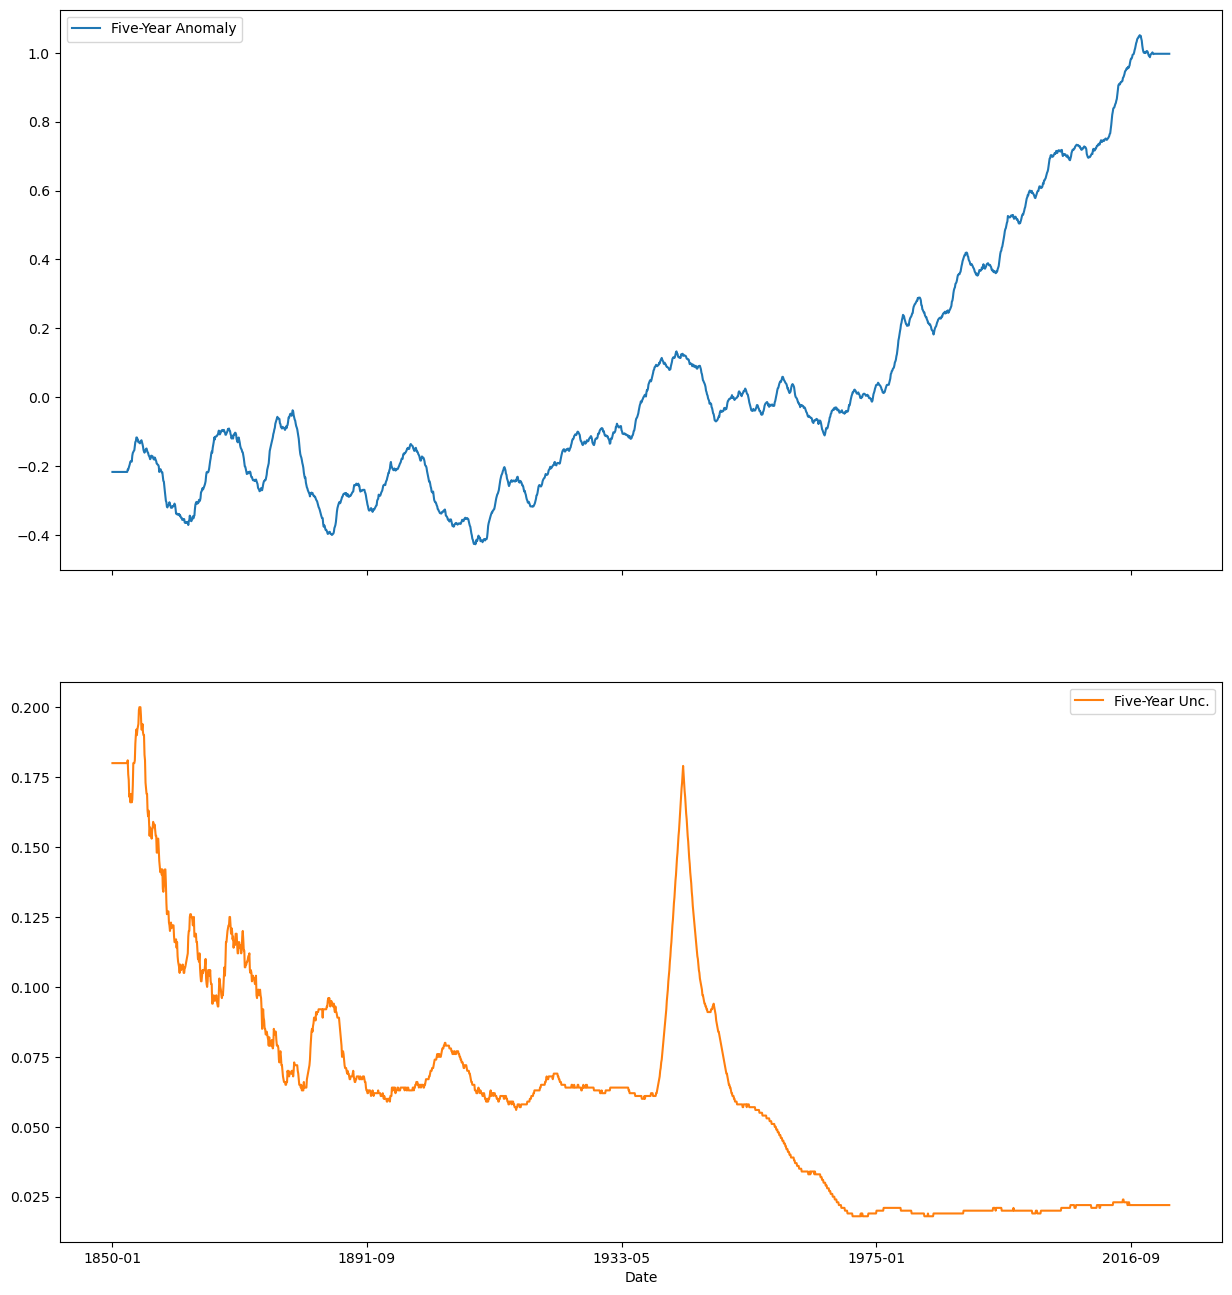

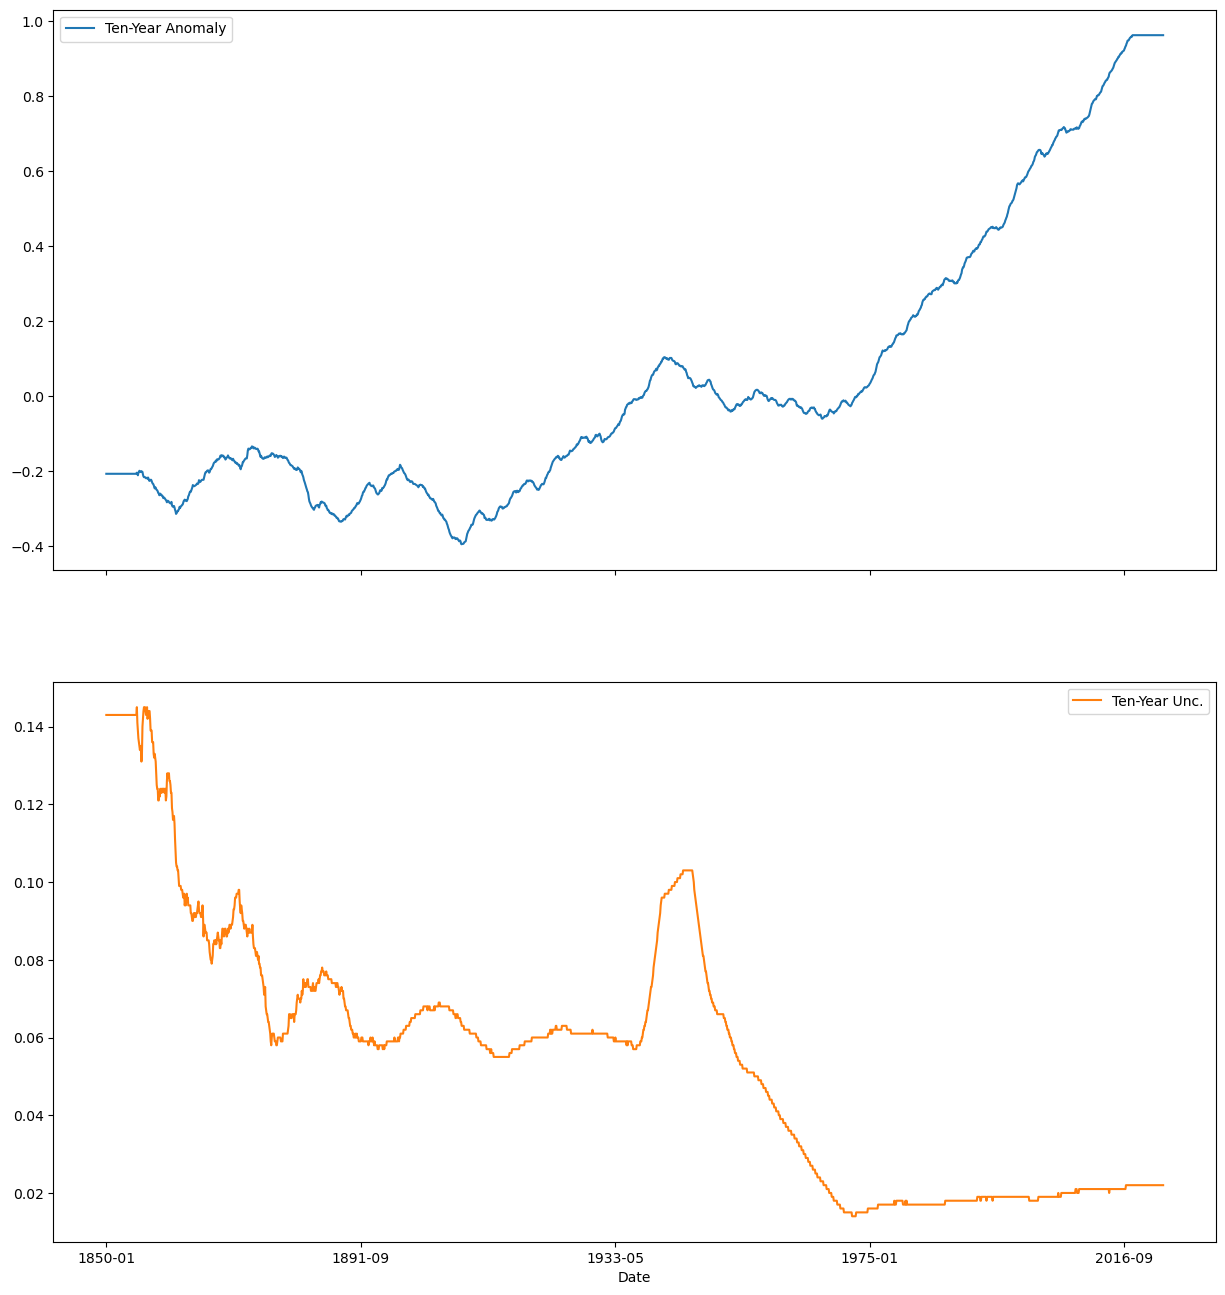

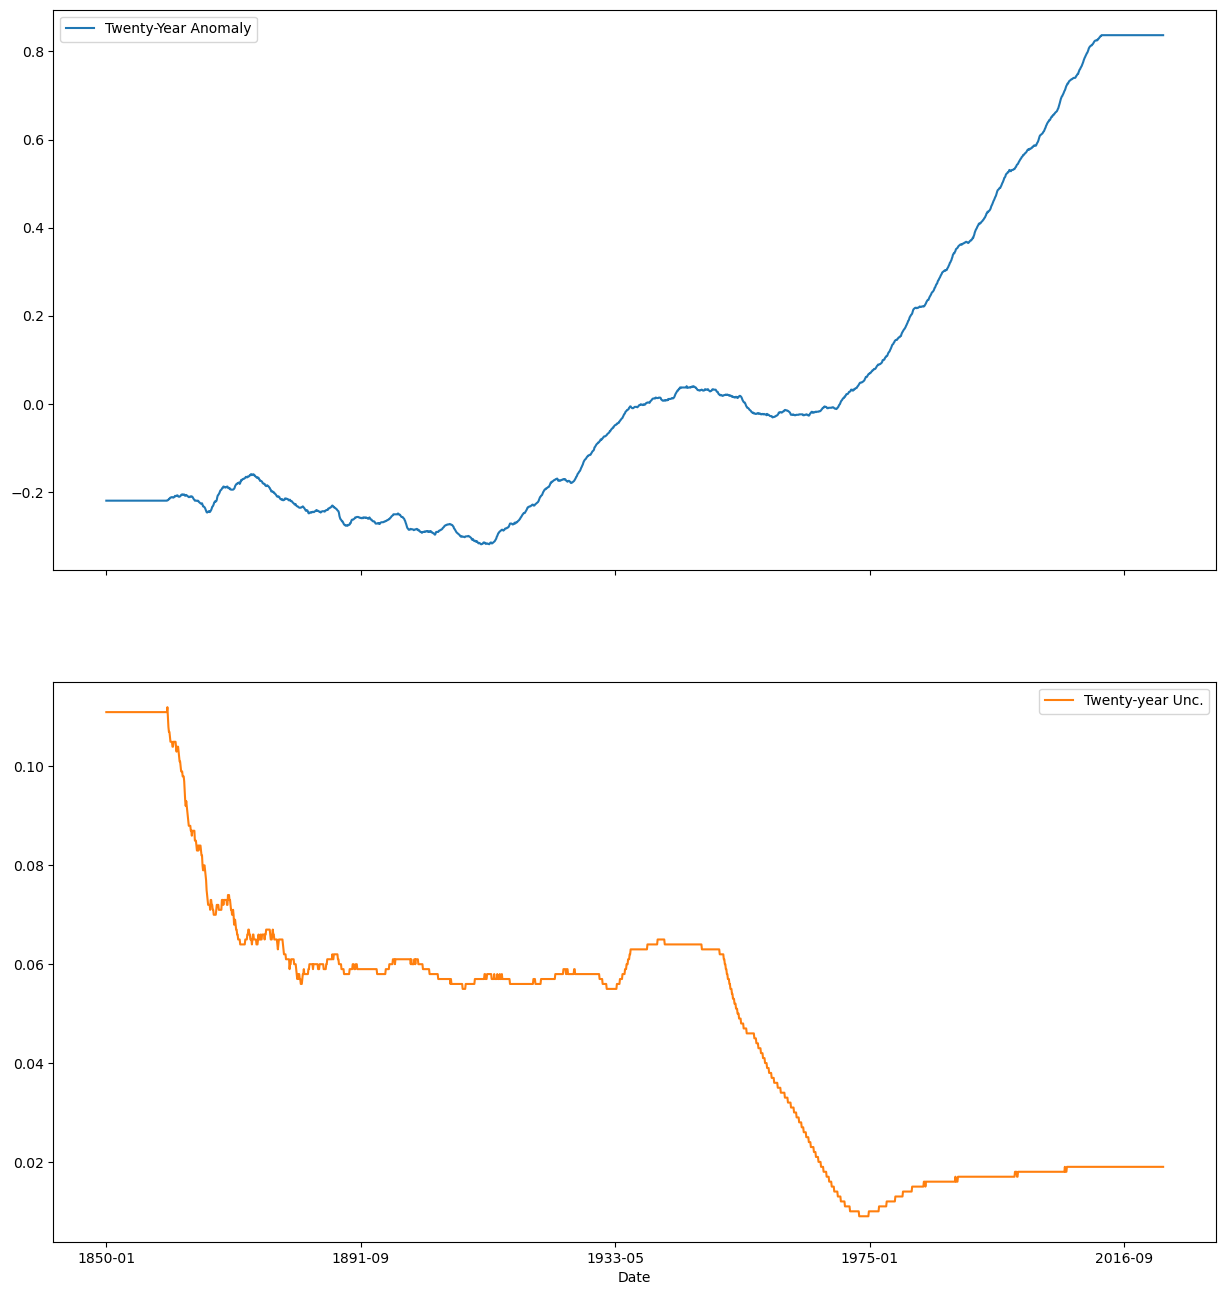

In [15]:
plot_relevant(df3)